In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
%pylab inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#устраним ошибки со шрифтами
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import *
from sklearn.metrics import *
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test = pd.read_csv('test.csv')

In [3]:
#a = train[[ 'MSSubClass', 'LotFrontage', 'LotArea',  'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC','Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
#print(a.corr())


In [4]:
y_train = train['SalePrice']

In [5]:
y_train.value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

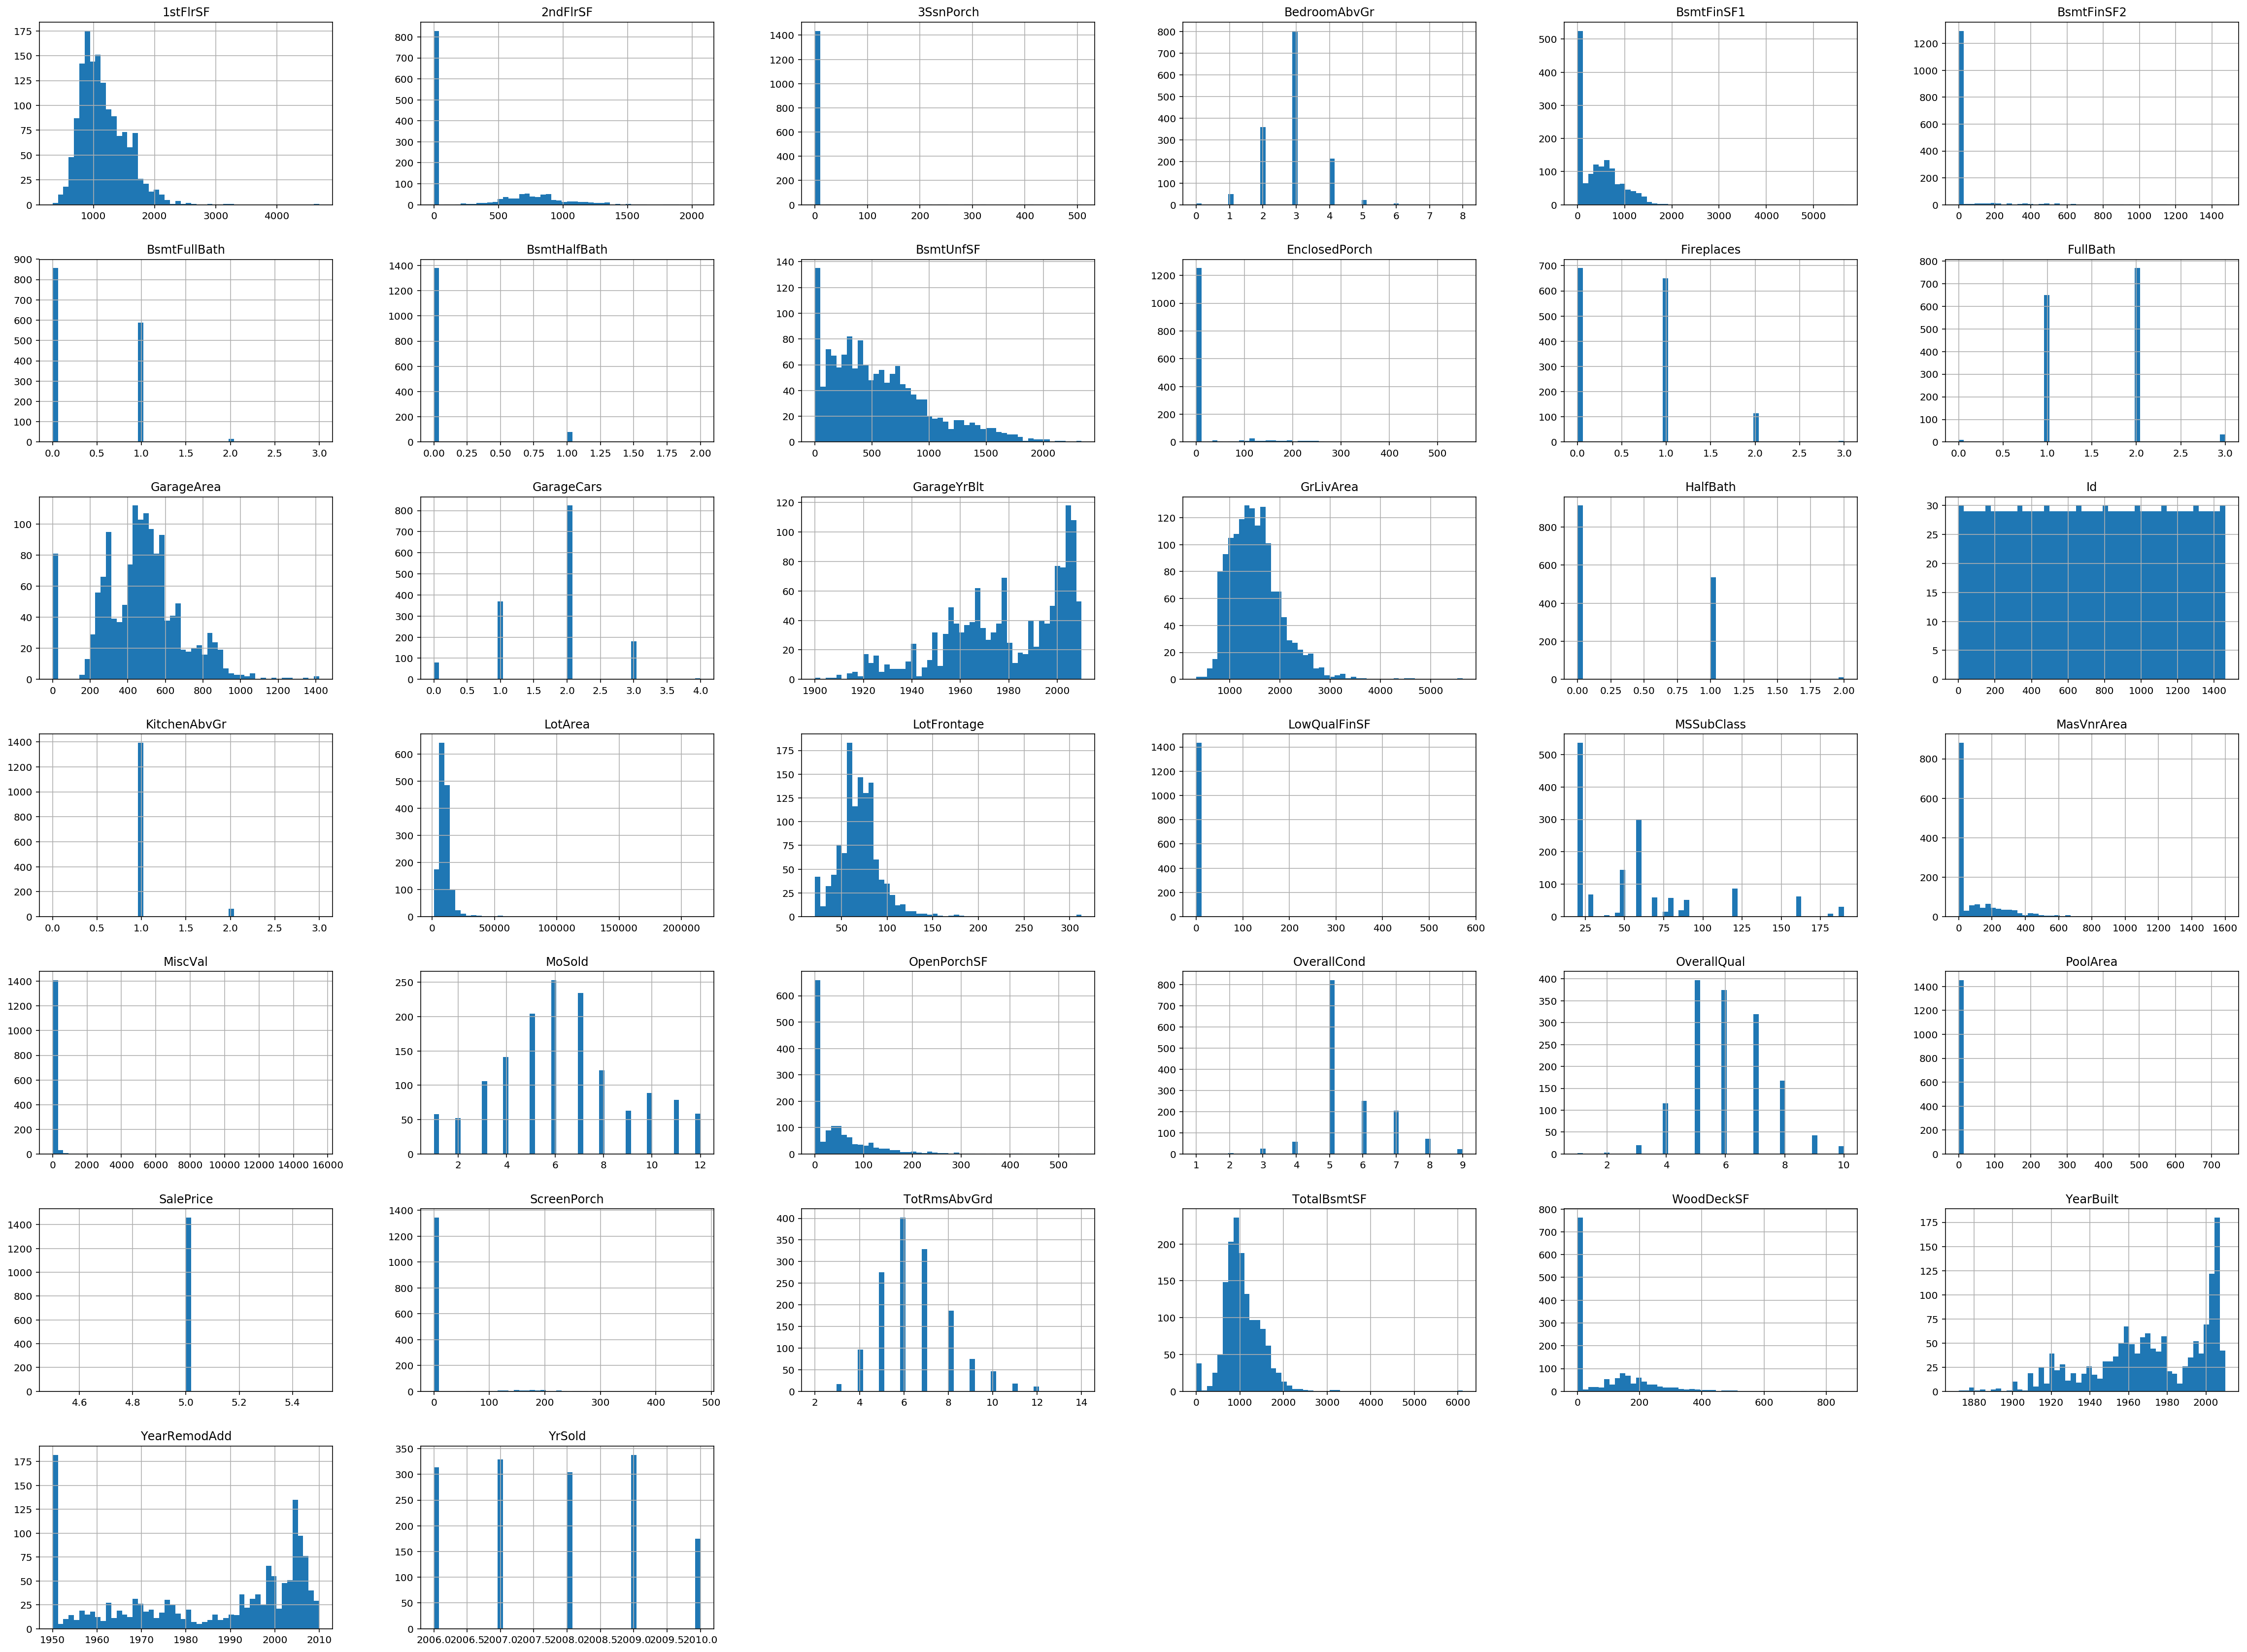

In [21]:
_ = train.hist(bins=50, figsize=(40,30))

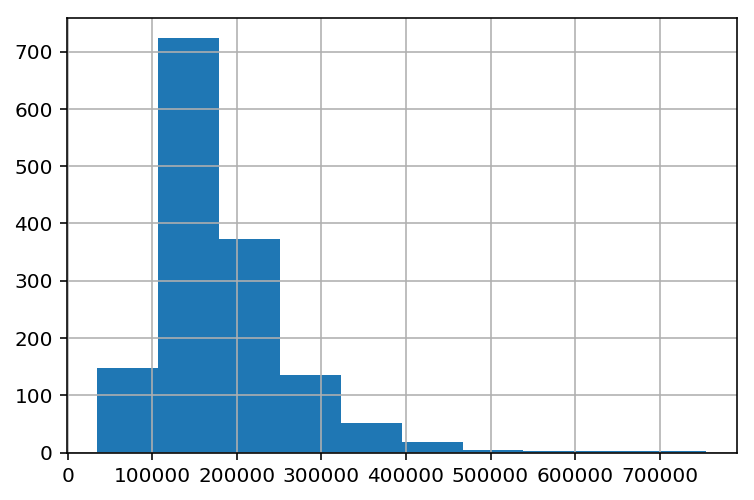

In [8]:
y_train.hist()

In [10]:
z = np.log(y_train)

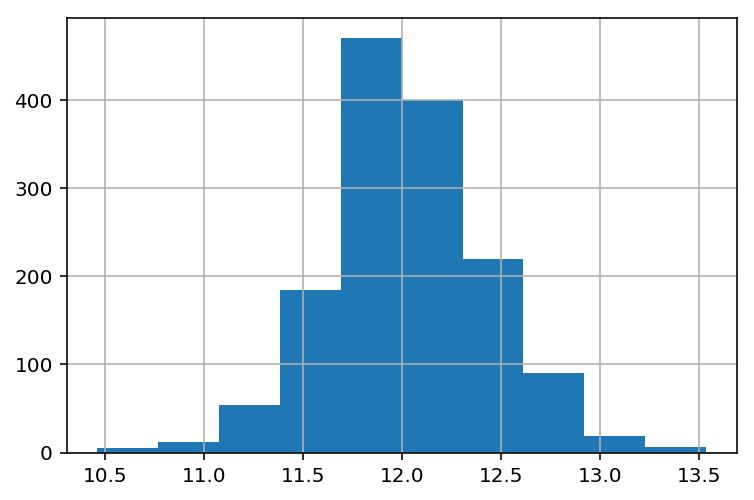

In [11]:
z.hist()

In [23]:
from sklearn.linear_model import LinearRegression
#regression = LinearRegression()
#regression.fit(X_train, Y_train)
#regression.score(X_train, Y_train)

In [4]:
cat_feat = list(test.dtypes[test.dtypes == object].index)
num_feat = [f for f in test if f not in (cat_feat + ['ID', 'Saleprice'])]
cat_nunique = train[cat_feat].nunique()
#print(cat_nunique)
#cat_feat = list(cat_nunique[cat_nunique < 30].index)

In [217]:
a = []
for columns in train:
    a += [train[columns].corr(train['SalePrice'], method= 'spearman')]
b = ["{:15} {:.5f}".format(x, y) for y, x in zip(a,train.columns)]

In [218]:
x = pd.DataFrame(a, train.columns).reset_index()
x.columns = ['feature', 'corr']

In [219]:
feature = []
for i in range(81):
    if abs(x['corr'][i]) < 0.2:
        feature += [x.feature[i]]
feature.extend(['Alley', 'PoolQC', 'Fence'])

In [5]:
train.drop(cat_feat, axis=1, inplace=True)

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [230]:
test.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleCondition'],
      dtype='object')

In [7]:
test.drop(cat_feat, axis=1, inplace=True)

In [232]:
cat_feat = list(train.dtypes[train.dtypes == object].index)

In [233]:
cat_nunique = train[cat_feat].nunique()
cat_feat = list(cat_nunique[cat_nunique < 10].index)

In [234]:
len(cat_feat)

15

In [235]:
train['Qual_ext_kit'] = train['ExterQual'] + train['KitchenQual']

In [236]:
test['Qual_ext_kit'] = test['ExterQual'] + test['KitchenQual']

In [237]:
num_feat = [f for f in train if f not in (cat_feat + ['SalePrice'])]

In [238]:
cat_feat.remove('ExterQual')
cat_feat.remove('KitchenQual')

In [239]:
cat_feat.append('Qual_ext_kit')

In [240]:
le = preprocessing.LabelEncoder()
le.fit( train['Qual_ext_kit'] )
le.classes_
le.transform( [ 'ExEx', 'ExGd', 'ExTA', 'FaFa', 'FaTA', 'GdEx', 'GdGd', 'GdTA',
       'TAEx', 'TAFa', 'TAGd', 'TATA' ] )
q = pd.Series( le.transform( train['Qual_ext_kit'] ) )
X_train = pd.concat([train, q], axis=1)

In [8]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


lep = preprocessing.LabelEncoder()
lep.fit( test['Qual_ext_kit'] )
lep.classes_
lep.transform( [ 'ExEx', 'ExGd', 'ExTA', 'FaFa', 'FaTA', 'GdEx', 'GdGd', 'GdTA',
       'TAEx', 'TAFa', 'TAGd', 'TATA' ] )
q = pd.Series( le.transform( test['Qual_ext_kit'] ) )
X_test = pd.concat([test, q], axis=1)

In [242]:
num_feat.append('Qual_ext_kit')
cat_feat.remove('Qual_ext_kit')

In [243]:
#print(cat_feat)
#print(num_feat)

In [244]:
for i in range(len(cat_feat)):
    print(cat_feat[i], X_train[cat_feat[i]].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
CentralAir ['Y' 'N']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
PavedDrive ['Y' 'N' 'P']
SaleCondition ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


Ex 10
Gd 8
TA 6
Fa 4
Po 2
nan 5

ExterQual BsmtQual  HeatingQC KitchenQual

In [245]:
def quality(row):
    if row['KitchenQual'] == 'Ex':
        return int(10)
    if row['KitchenQual'] == 'Gd':
        return int(8)
    if row['KitchenQual'] == 'TA':
        return int(6)
    if row['KitchenQual'] == 'Fa':
        return int(4)
    if row['KitchenQual'] == 'Po':
        return int(2)
    if row['KitchenQual'] == 'nan':
        return int(5)
    else:
        return int(5)
train['Kitchen_Qual'] = train.apply( quality, axis = 1 )

In [246]:
def quality1(row):
    if row['HeatingQC'] == 'Ex':
        return int(10)
    if row['HeatingQC'] == 'Gd':
        return int(8)
    if row['HeatingQC'] == 'TA':
        return int(6)
    if row['HeatingQC'] == 'Fa':
        return int(4)
    if row['HeatingQC'] == 'Po':
        return int(2)
    if row['HeatingQC'] == 'nan':
        return int(5)
    else:
        return int(5)
train['Heating_QC'] = train.apply( quality1, axis = 1 )

In [247]:
def quality2(row):
    if row['BsmtQual'] == 'Ex':
        return int(10)
    if row['BsmtQual'] == 'Gd':
        return int(8)
    if row['BsmtQual'] == 'TA':
        return int(6)
    if row['BsmtQual'] == 'Fa':
        return int(4)
    if row['BsmtQual'] == 'Po':
        return int(2)
    if row['BsmtQual'] == 'nan':
        return int(5)
    else:
        return int(5)
train['Bsmt_Qual'] = train.apply( quality2, axis = 1 )

In [248]:
def quality3(row):
    if row['ExterQual'] == 'Ex':
        return int(10)
    if row['ExterQual'] == 'Gd':
        return int(8)
    if row['ExterQual'] == 'TA':
        return int(6)
    if row['ExterQual'] == 'Fa':
        return int(4)
    if row['ExterQual'] == 'Po':
        return int(2)
    if row['ExterQual'] == 'nan':
        return int(6)
    else:
        return int(5)
train['External_Qual'] = train.apply( quality3, axis = 1 )

In [249]:
test['Kitchen_Qual'] = test.apply( quality, axis = 1 )
test['Heating_QC'] = test.apply( quality1, axis = 1 )
test['Bsmt_Qual'] = test.apply( quality2, axis = 1 )
test['External_Qual'] = test.apply( quality3, axis = 1 )

In [250]:
train['Kitchen_Qual'] = train.apply( quality, axis = 1 )
train['Heating_QC'] = train.apply( quality1, axis = 1 )
train['Bsmt_Qual'] = train.apply( quality2, axis = 1 )
train['External_Qual'] = train.apply( quality3, axis = 1 )

In [251]:
train['quality'] = (train['Kitchen_Qual']+ train['Heating_QC'] + train['External_Qual']+ train['Bsmt_Qual'])/4

In [252]:
train.drop(['Kitchen_Qual', 'Heating_QC', 'External_Qual', 'Bsmt_Qual', 'ExterQual' ,'BsmtQual' , 'HeatingQC', 'KitchenQual'], axis=1, inplace=True)

In [253]:
train.drop(['Qual_ext_kit'], axis=1, inplace=True)

In [254]:
cat_feat = list(train.dtypes[train.dtypes == object].index)
num_feat = [f for f in train if f not in (cat_feat + ['ID', 'Saleprice'])]

In [255]:
test['quality'] = (test['Kitchen_Qual']+ test['Heating_QC'] + test['External_Qual']+ test['Bsmt_Qual'])/4
test.drop(['Kitchen_Qual', 'Heating_QC', 'External_Qual', 'Bsmt_Qual', 'ExterQual' ,'BsmtQual' , 'HeatingQC', 'KitchenQual', 'Qual_ext_kit'], axis=1, inplace=True)

In [256]:
test.SaleCondition.unique()

array(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'],
      dtype=object)

In [257]:
cat_feat

['MSZoning',
 'LotShape',
 'HouseStyle',
 'Foundation',
 'BsmtExposure',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleCondition']

In [258]:
num_feat

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice',
 'quality']

In [259]:
a = []
for columns in train:
    a += [train[columns].corr(train['SalePrice'], method= 'spearman')]
b = ["{:15} {:.5f}".format(x, y) for y, x in zip(a,train.columns)]
b

['MSZoning        -0.33491',
 'LotFrontage     0.40908',
 'LotArea         0.45646',
 'LotShape        -0.30592',
 'HouseStyle      0.25367',
 'OverallQual     0.80983',
 'YearBuilt       0.65268',
 'YearRemodAdd    0.57116',
 'MasVnrArea      0.42131',
 'Foundation      0.49193',
 'BsmtExposure    -0.27949',
 'BsmtFinSF1      0.30187',
 'TotalBsmtSF     0.60273',
 'CentralAir      0.31329',
 'Electrical      0.29553',
 '1stFlrSF        0.57541',
 '2ndFlrSF        0.29360',
 'GrLivArea       0.73131',
 'BsmtFullBath    0.22512',
 'FullBath        0.63596',
 'HalfBath        0.34301',
 'BedroomAbvGr    0.23491',
 'TotRmsAbvGrd    0.53259',
 'Fireplaces      0.51925',
 'GarageType      -0.45058',
 'GarageYrBlt     0.59379',
 'GarageFinish    -0.59226',
 'GarageCars      0.69071',
 'GarageArea      0.64938',
 'PavedDrive      0.28060',
 'WoodDeckSF      0.35380',
 'OpenPorchSF     0.47756',
 'EnclosedPorch   -0.21839',
 'SaleCondition   0.31967',
 'SalePrice       1.00000',
 'quality     

In [260]:
train['Garage_Type_Fin'] = train['GarageFinish'] + train['GarageType']
test['Garage_Type_Fin'] = test['GarageFinish'] + test['GarageType']
train.drop(['GarageFinish', 'GarageType'], axis=1, inplace=True)
test.drop(['GarageFinish', 'GarageType'], axis=1, inplace=True)

In [261]:
#test.drop(['Id', 'MSSubClass' ,'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF' ,'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], axis=1, inplace=True)



In [263]:
cat_feat = list(test.dtypes[test.dtypes == object].index)
num_feat = [f for f in test if f not in (cat_feat + ['ID', 'Saleprice'])]

cat_nunique = train[cat_feat].nunique()
#print(cat_nunique)
cat_feat = list(cat_nunique[cat_nunique < 30].index)

In [264]:
train.drop

<bound method NDFrame.drop of      MSZoning  LotFrontage  LotArea LotShape HouseStyle  OverallQual  \
0          RL         65.0     8450      Reg     2Story            7   
1          RL         80.0     9600      Reg     1Story            6   
2          RL         68.0    11250      IR1     2Story            7   
3          RL         60.0     9550      IR1     2Story            7   
4          RL         84.0    14260      IR1     2Story            8   
5          RL         85.0    14115      IR1     1.5Fin            5   
6          RL         75.0    10084      Reg     1Story            8   
7          RL          NaN    10382      IR1     2Story            7   
8          RM         51.0     6120      Reg     1.5Fin            7   
9          RL         50.0     7420      Reg     1.5Unf            5   
10         RL         70.0    11200      Reg     1Story            5   
11         RL         85.0    11924      IR1     2Story            9   
12         RL          NaN    1296

In [265]:
dummy_train = pd.get_dummies(train, columns=cat_feat)
dummy_test = pd.get_dummies(test, columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))
# вот эта строка - если есть данные в тесте но нет в трейне

X_train = dummy_train[dummy_cols]
X_test = dummy_test[dummy_cols]


X_train = pd.concat([train[num_feat], dummy_train], axis=1)

X_test = pd.concat([test[num_feat], dummy_test], axis=1)
#-999 вместо пропущенные значения ставится

In [11]:
X_train = train

In [16]:
from sklearn.preprocessing import Imputer

In [17]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [18]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns.values.tolist())

In [19]:
X_train = X_train_imputed

In [20]:
X_train_imputed.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputer.fit(X_test)
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns.values.tolist())
X_train = X_train_imputed

In [4]:
Y = train['SalePrice']

In [5]:
train.drop('SalePrice', axis=1, inplace=True)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split( train, Y, test_size = 0.3, random_state = 0 )

In [22]:
X_train.columns.nunique()

37

In [23]:
X_test.columns.nunique()

37

In [133]:
cat_fea2 = list(X_train.dtypes[X_train.dtypes == float64].index)
#num_feat = [f for f in test if f not in (cat_feat + ['ID', 'Saleprice'])]

cat_nunique1 = X_train[cat_fea2].nunique()
#print(cat_nunique)
cat_feat2 = list(cat_nunique1[cat_nunique1 > 2].index)



In [134]:
cat_feat2

['LotFrontage',
 'LotFrontage',
 'LotArea',
 'LotArea',
 'OverallQual',
 'OverallQual',
 'YearBuilt',
 'YearBuilt',
 'YearRemodAdd',
 'YearRemodAdd',
 'MasVnrArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '1stFlrSF',
 '2ndFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtFullBath',
 'FullBath',
 'FullBath',
 'HalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'TotRmsAbvGrd',
 'Fireplaces',
 'Fireplaces',
 'GarageYrBlt',
 'GarageYrBlt',
 'GarageCars',
 'GarageCars',
 'GarageArea',
 'GarageArea',
 'WoodDeckSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'EnclosedPorch',
 'quality',
 'quality',
 'LotFrontage',
 'LotFrontage',
 'LotArea',
 'LotArea',
 'OverallQual',
 'OverallQual',
 'YearBuilt',
 'YearBuilt',
 'YearRemodAdd',
 'YearRemodAdd',
 'MasVnrArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '1stFlrSF',
 '2ndFlrSF',

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit(X_train).transform(X_train)
X_train_imputed = pd.DataFrame(X_train_scaler, columns=X_train.columns.values.tolist())
X_train = X_train_imputed

X_test_scaler = scaler.fit(X_test).transform(X_test)
X_test_imputed = pd.DataFrame(X_test_scaler, columns=X_test.columns.values.tolist())
X_test = X_test_imputed

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit(X_train, columns=cat_feat2).transform(X_train, columns=cat_feat2)
X_train_imputed = pd.DataFrame(X_train_scaler, columns=X_train.columns.values.tolist())


X_test_scaler = scaler.fit(X_test, columns =cat_feat2).transform(X_test, columns=cat_feat2)
X_test_imputed = pd.DataFrame(X_test_scaler, columns=X_test.columns.values.tolist())


dummy_train = pd.get_dummies(train, columns=cat_feat)
dummy_test = pd.get_dummies(test, columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))
# вот эта строка - если есть данные в тесте но нет в трейне

X_train = dummy_train[dummy_cols]
X_test = dummy_test[dummy_cols]


X_train = pd.concat([train[num_feat], dummy_train], axis=1)

X_test = pd.concat([test[num_feat], dummy_test], axis=1)

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
from sklearn.ensemble import BaggingRegressor

bag_clf = BaggingRegressor(n_estimators=20, n_jobs=-1)
bag_clf.fit(X_train, Y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=20, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [280]:
y_pred_test = bag_clf.predict(X_test)[:, 1]
y_pred_train = bag_clf.predict(X_train)[:, 1]

IndexError: too many indices for array

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=600, max_depth=15, min_samples_leaf=20, max_features=30, n_jobs=-1)

clf_rf.fit(X_train, Y_train)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10b95d660, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10b95d660, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.ensemble import RandomForestClassif...ures=30, n_jobs=-1)\n\nclf_rf.fit(X_train, Y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 4, 20, 35, 5, 752075, tzinfo=tzutc()), 'msg_id': 'c969c27d78c5420a8c7d1db29dde668b', 'msg_type': 'execute_request', 'session': '9c36225899d14d029fcf784b74f7983c', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c969c27d78c5420a8c7d1db29dde668b', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'9c36225899d14d029fcf784b74f7983c']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.ensemble import RandomForestClassif...ures=30, n_jobs=-1)\n\nclf_rf.fit(X_train, Y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 4, 20, 35, 5, 752075, tzinfo=tzutc()), 'msg_id': 'c969c27d78c5420a8c7d1db29dde668b', 'msg_type': 'execute_request', 'session': '9c36225899d14d029fcf784b74f7983c', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c969c27d78c5420a8c7d1db29dde668b', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'9c36225899d14d029fcf784b74f7983c'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.ensemble import RandomForestClassif...ures=30, n_jobs=-1)\n\nclf_rf.fit(X_train, Y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 4, 20, 35, 5, 752075, tzinfo=tzutc()), 'msg_id': 'c969c27d78c5420a8c7d1db29dde668b', 'msg_type': 'execute_request', 'session': '9c36225899d14d029fcf784b74f7983c', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c969c27d78c5420a8c7d1db29dde668b', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.ensemble import RandomForestClassif...ures=30, n_jobs=-1)\n\nclf_rf.fit(X_train, Y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.ensemble import RandomForestClassif...ures=30, n_jobs=-1)\n\nclf_rf.fit(X_train, Y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.ensemble import RandomForestClassif...ures=30, n_jobs=-1)\n\nclf_rf.fit(X_train, Y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.ensemble import RandomForestClassif...ures=30, n_jobs=-1)\n\nclf_rf.fit(X_train, Y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.ensemble import RandomForestClassif...ures=30, n_jobs=-1)\n\nclf_rf.fit(X_train, Y_train)', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-31-5ed93720fb23>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 115068860, execution_..._before_exec=None error_in_exec=None result=None>)
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])
   2855                 code = compiler(mod, cell_name, "single")
-> 2856                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1142a6e40, file "<ipython-input-31-5ed93720fb23>", line 5>
        result = <ExecutionResult object at 115068860, execution_..._before_exec=None error_in_exec=None result=None>
   2857                     return True
   2858 
   2859             # Flush softspace
   2860             if softspace(sys.stdout, 0):

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1142a6e40, file "<ipython-input-31-5ed93720fb23>", line 5>, result=<ExecutionResult object at 115068860, execution_..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1142a6e40, file "<ipython-input-31-5ed93720fb23>", line 5>
        self.user_global_ns = {'ALLOW_THREADS': 1, 'Annotation': <class 'matplotlib.text.Annotation'>, 'Arrow': <class 'matplotlib.patches.Arrow'>, 'Artist': <class 'matplotlib.artist.Artist'>, 'AutoLocator': <class 'matplotlib.ticker.AutoLocator'>, 'Axes': <class 'matplotlib.axes._axes.Axes'>, 'AxisError': <class 'numpy.core._internal.AxisError'>, 'BUFSIZE': 8192, 'Button': <class 'matplotlib.widgets.Button'>, 'CLIP': 0, ...}
        self.user_ns = {'ALLOW_THREADS': 1, 'Annotation': <class 'matplotlib.text.Annotation'>, 'Arrow': <class 'matplotlib.patches.Arrow'>, 'Artist': <class 'matplotlib.artist.Artist'>, 'AutoLocator': <class 'matplotlib.ticker.AutoLocator'>, 'Axes': <class 'matplotlib.axes._axes.Axes'>, 'AxisError': <class 'numpy.core._internal.AxisError'>, 'BUFSIZE': 8192, 'Button': <class 'matplotlib.widgets.Button'>, 'CLIP': 0, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/Users/sergej/9th homework/<ipython-input-31-5ed93720fb23> in <module>()
      1 from sklearn.ensemble import RandomForestClassifier
      2 
      3 clf_rf = RandomForestClassifier(n_estimators=600, max_depth=15, min_samples_leaf=20, max_features=30, n_jobs=-1)
      4 
----> 5 clf_rf.fit(X_train, Y_train)

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0....0, 1.000e+00,
        0.000e+00]], dtype=float32), y=array([[354.],
       [258.],
       [ 86.],
   .....,
       [ 79.],
       [377.],
       [356.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 599
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri May  4 23:35:06 2018
PID: 4662                               Python 3.6.4: /anaconda3/bin/python
...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...        random_state=1076336940, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0....0, 1.000e+00,
        0.000e+00]], dtype=float32), array([[354.],
       [258.],
       [ 86.],
   .....,
       [ 79.],
       [377.],
       [356.]]), None, 0, 600), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...        random_state=1076336940, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0....0, 1.000e+00,
        0.000e+00]], dtype=float32), array([[354.],
       [258.],
       [ 86.],
   .....,
       [ 79.],
       [377.],
       [356.]]), None, 0, 600)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...        random_state=1076336940, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0....0, 1.000e+00,
        0.000e+00]], dtype=float32), y=array([[354.],
       [258.],
       [ 86.],
   .....,
       [ 79.],
       [377.],
       [356.]]), sample_weight=None, tree_idx=0, n_trees=600, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...       random_state=1076336940, splitter='best')>
        X = array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0....0, 1.000e+00,
        0.000e+00]], dtype=float32)
        y = array([[354.],
       [258.],
       [ 86.],
   .....,
       [ 79.],
       [377.],
       [356.]])
        sample_weight = None
        curr_sample_weight = array([0., 0., 0., ..., 1., 0., 2.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1076336940, splitter='best'), X=array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0....0, 1.000e+00,
        0.000e+00]], dtype=float32), y=array([[354.],
       [258.],
       [ 86.],
   .....,
       [ 79.],
       [377.],
       [356.]]), sample_weight=array([0., 0., 0., ..., 1., 0., 2.]), check_input=False, X_idx_sorted=None)
    785 
    786         super(DecisionTreeClassifier, self).fit(
    787             X, y,
    788             sample_weight=sample_weight,
    789             check_input=check_input,
--> 790             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    791         return self
    792 
    793     def predict_proba(self, X, check_input=True):
    794         """Predict class probabilities of the input samples X.

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1076336940, splitter='best'), X=array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0....0, 1.000e+00,
        0.000e+00]], dtype=float32), y=array([[354.],
       [258.],
       [ 86.],
   .....,
       [ 79.],
       [377.],
       [356.]]), sample_weight=array([0., 0., 0., ..., 1., 0., 2.]), check_input=False, X_idx_sorted=None)
    231 
    232         self.max_features_ = max_features
    233 
    234         if len(y) != n_samples:
    235             raise ValueError("Number of labels=%d does not match "
--> 236                              "number of samples=%d" % (len(y), n_samples))
        y = array([[354.],
       [258.],
       [ 86.],
   .....,
       [ 79.],
       [377.],
       [356.]])
        n_samples = 1460
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")

ValueError: Number of labels=1022 does not match number of samples=1460
___________________________________________________________________________

In [34]:
y_pred_rf_test = clf_rf.predict_proba(X_test)
y_pred_rf_train = clf_rf.predict_proba(X_train)

In [7]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [36]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1000)

In [37]:
results = cross_val_score(clf_rf, X_train, Y_train, cv=skf)

In [38]:
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 8.38%


In [25]:
import numpy as np
from sklearn.model_selection import KFold

In [28]:
kf = KFold(n_splits=10)
results = cross_val_score(clf_rf, X_train, Y_train, cv=kf)

NameError: name 'y_train' is not defined

In [29]:
X_train.shape

(1460, 326)

In [30]:
Y_train.shape

(1022,)

In [58]:
Y_train

,index,SalePrice
0,64,219500.0
1,682,173000.0
2,960,116500.0
3,1384,105000.0
4,1100,60000.0
5,416,149500.0
6,1034,119750.0
7,853,158000.0
8,472,148000.0
9,1011,100000.0


In [293]:
X_train.shape

(1022, 107)

In [296]:
Y_train.shape

(1022,)

In [286]:
imp = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
imp.sort_values(ascending=False)
#imp.sort_values(ascending=False).iloc[:20].plot(kind='barh') # график 

GrLivArea                     0.056478
LotArea                       0.051856
GrLivArea                     0.049034
TotalBsmtSF                   0.046628
LotArea                       0.045862
GarageArea                    0.045729
GarageArea                    0.041709
TotalBsmtSF                   0.041449
1stFlrSF                      0.038493
1stFlrSF                      0.036769
BsmtFinSF1                    0.033372
LotFrontage                   0.027498
LotFrontage                   0.025756
BsmtFinSF1                    0.024587
YearRemodAdd                  0.022636
OpenPorchSF                   0.022317
YearBuilt                     0.022038
OpenPorchSF                   0.021291
YearBuilt                     0.020296
GarageYrBlt                   0.019317
WoodDeckSF                    0.019266
YearRemodAdd                  0.018911
MasVnrArea                    0.017662
quality                       0.017474
WoodDeckSF                    0.017434
GarageYrBlt              

In [78]:
from sklearn.preprocessing import StandardScaler

train_median = train[num_feat].median()

X_train_lin = pd.concat([train[num_feat].fillna(train_median),
                     train[num_feat + cat_feat].isnull().astype(np.int8).add_suffix('_NaN'),
                     dummy_train], axis=1)

X_test_lin = pd.concat([test[num_feat].fillna(train_median),
                     test[num_feat + cat_feat].isnull().astype(np.int8).add_suffix('_NaN'),
                     dummy_test], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_lin[num_feat])

X_train_lin[num_feat] = scaler.transform(X_train_lin[num_feat])
X_test_lin[num_feat] = scaler.transform(X_test_lin[num_feat])

In [315]:
clf_lr = LogisticRegression(penalty='l1', C=100)

clf_lr.fit(X_train, Y_train)

y_pred_lin_test = clf_lr.predict_proba(X_test)[:, 1]
y_pred_lin_train = clf_lr.predict_proba(X_train)[:, 1]

clf_lr.score(X_train, Y_train)

0.9863013698630136

In [317]:
clf_lr.score(X_test, Y_test)

0.0045662100456621

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)
regression.score(X_train, Y_train)

In [32]:
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [201]:
X_train.reset_index()

,index,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,...,Garage_Type_Fin_RFnAttchd,Garage_Type_Fin_RFnBasment,Garage_Type_Fin_RFnBuiltIn,Garage_Type_Fin_RFnDetchd,Garage_Type_Fin_Unf2Types,Garage_Type_Fin_UnfAttchd,Garage_Type_Fin_UnfBasment,Garage_Type_Fin_UnfBuiltIn,Garage_Type_Fin_UnfCarPort,Garage_Type_Fin_UnfDetchd
0,0,0.014925,-0.115977,0.678402,0.862117,0.648981,2.592480,0.690634,0.004040,-0.280153,...,1.703163,-0.062684,-0.14128,-0.126113,-0.054259,-0.427633,-0.083045,-0.054259,-0.070117,-0.555499
1,1,0.014925,-0.746722,-0.058396,0.829035,0.600190,-0.571871,1.304994,0.574723,0.345845,...,-0.587143,-0.062684,-0.14128,-0.126113,-0.054259,2.338451,-0.083045,-0.054259,-0.070117,-0.555499
2,2,-0.947952,-0.326744,-0.795194,-0.428097,1.136886,-0.571871,0.590567,-0.481285,-0.812519,...,-0.587143,-0.062684,-0.14128,-0.126113,-0.054259,-0.427633,-0.083045,-0.054259,-0.070117,-0.555499
3,3,-0.467713,-0.146600,-0.058396,-1.056663,-1.692964,-0.571871,-0.554376,-1.208053,-1.240552,...,-0.587143,-0.062684,-0.14128,-0.126113,-0.054259,-0.427633,-0.083045,-0.054259,-0.070117,1.800184
4,4,-0.467713,-0.210764,-3.005590,-1.685229,-1.692964,-0.571871,-0.354244,-1.866533,-1.936105,...,-0.587143,-0.062684,-0.14128,-0.126113,-0.054259,-0.427633,-0.083045,-0.054259,-0.070117,1.800184
5,5,0.204621,-0.264817,-0.058396,0.233552,-0.326830,0.549182,-0.542741,-0.934905,-1.310107,...,-0.587143,-0.062684,-0.14128,-0.126113,-0.054259,-0.427633,-0.083045,-0.054259,-0.070117,-0.555499
6,6,-0.947952,-0.414434,-0.795194,-1.089745,-1.692964,-0.571871,-1.029109,-0.330078,-0.555699,...,-0.587143,-0.062684,-0.14128,-0.126113,-0.054259,-0.427633,12.041595,-0.054259,-0.070117,-0.555499
7,7,0.014925,0.148454,-0.058396,-0.229602,-1.009897,0.063208,0.283387,0.174757,0.757826,...,1.703163,-0.062684,-0.14128,-0.126113,-0.054259,-0.427633,-0.083045,-0.054259,-0.070117,-0.555499
8,8,-1.668311,-0.670115,-0.058396,1.126777,0.990514,-0.130077,0.039040,-1.239757,-0.240025,...,-0.587143,15.953056,-0.14128,-0.126113,-0.054259,-0.427633,-0.083045,-0.054259,-0.070117,-0.555499
9,9,0.252645,-0.072229,-0.795194,-0.196520,-0.961106,-0.571871,-1.029109,-2.573791,1.343696,...,-0.587143,-0.062684,-0.14128,-0.126113,-0.054259,-0.427633,-0.083045,-0.054259,-0.070117,-0.555499


In [322]:
y_pred = regression.predict(X_test)

In [323]:
["{:15} {:.3f}".format(x, y) for y, x in sorted(zip(regression.coef_,train.columns))]

['Foundation      -4737704705774117.000',
 'PavedDrive      -4219734350051329.000',
 'BsmtFinSF1      -3743160376874969.000',
 'SalePrice       -2989082699803696.000',
 'LotArea         -2529049317656187.000',
 'Garage_Type_Fin -2042733036129062.250',
 'OverallQual     -1551328252952384.500',
 'CentralAir      -1435893822695012.500',
 'GarageCars      -1414202726056290.500',
 'TotalBsmtSF     -1183757792522664.250',
 'YearRemodAdd    -657595022599803.125',
 'YearBuilt       -626582265124651.750',
 'BsmtFullBath    -512583875813389.250',
 'WoodDeckSF      -399712982275436.875',
 'Fireplaces      -388761087371925.000',
 'TotRmsAbvGrd    -295167730012916.312',
 '1stFlrSF        -257288778192064.656',
 'GrLivArea       -44989944593365.250',
 'MSZoning        -10186061870228.896',
 'GarageYrBlt     10186061872324.500',
 'HouseStyle      399712982277752.812',
 'FullBath        477402243811745.125',
 'EnclosedPorch   626582265131117.750',
 'SaleCondition   657595022611508.375',
 'HalfBath    

''

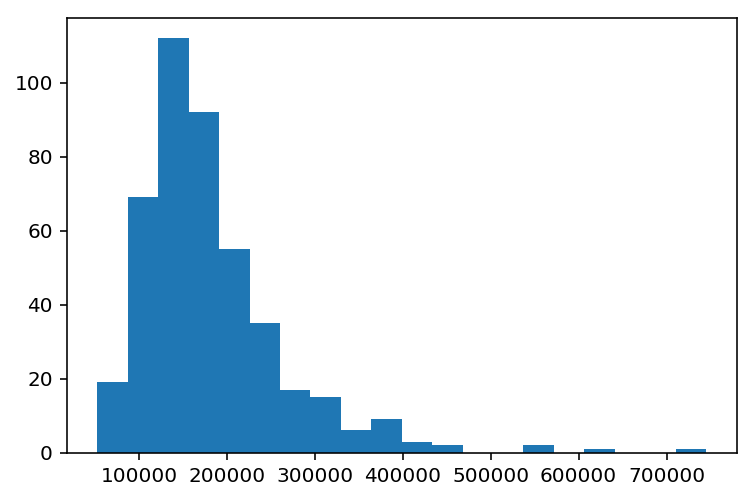

In [324]:
plt.hist(Y_test-y_pred_lin_test, bins=20)
''

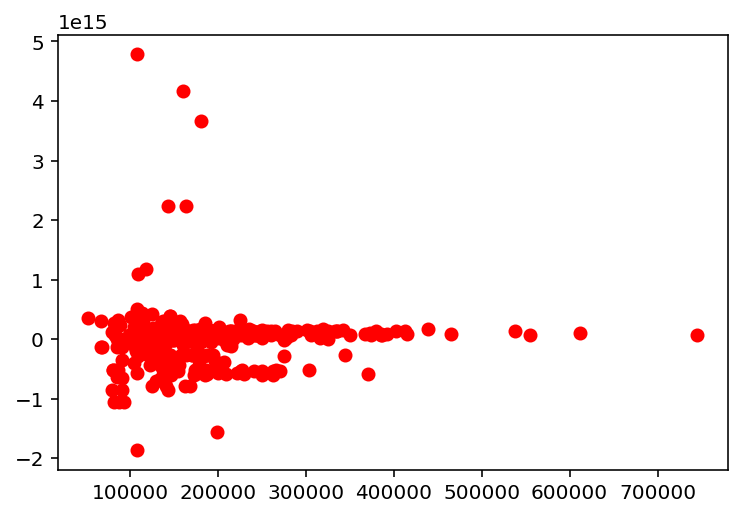

In [325]:
plt.plot(Y_test, y_pred, 'ro')

In [326]:
mse = np.mean((Y_test-y_pred)**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(Y_test-y_pred)))

mse 2.3237462593756733e+29
sqrt(mse) 482052513672076.3
avg_error 227453685412542.0


In [49]:
s4.to_csv( 'Predictions.csv', sep = ';', na_rep = '1', index = False )

NameError: name 's4' is not defined

In [ ]:
prediction = pd.read_csv('prediction.csv')

In [80]:
regression.score(X_train, Y_train)

0.8419640958079021

In [29]:
clf_lr = LogisticRegression(penalty='l1', C=100)

clf_lr.fit(X_train, Y_train)

y_pred_lin_test = clf_lr.predict_proba(X_test)[:, 1]
y_pred_lin_train = clf_lr.predict_proba(X_train)[:, 1]

clf_lr.score(X_train, Y_train)

0.9315068493150684

In [25]:
class MeanClassifier():
    def __init__(self, col):
        self._col = col
        
    def fit(self, X, y):
        self._y_mean = y.mean()
        self._means = y.groupby(X[self._col].astype(str)).mean()

    def predict_proba(self, X):
        new_feature = X[self._col].astype(str)\
            .map(self._means.to_dict())\
            .fillna(self._y_mean)
        return np.stack([1-new_feature, new_feature], axis=1)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(Y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict_proba(X_train.iloc[test_ind])[:, 1]
        meta_test += clf.predict_proba(X_test)[:, 1]
    
    return meta_train, meta_test / stack_cv.n_splits

In [51]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

meta_train = []
meta_test = []
col_names = []

print('mean features...')
for c in cat_nunique.index.tolist():
    clf = MeanClassifier(c)
    
    meta_tr, meta_te = get_meta_features(clf, X_train, X_train, X_test, stack_cv)

    meta_train.append(meta_tr)
    meta_test.append(meta_te)
    col_names.append('mean_pred_{}'.format(c))

print('SVM features...')
meta_tr, meta_te = get_meta_features(regression, X_train, Y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('svm_pred')

print('LR features...')
meta_tr, meta_te = get_meta_features(clf_lr, X_train, Y_train, X_test, stack_cv)


meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('rf_pred')

mean features...
SVM features...


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multiclass-multioutput' instead.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [52]:
y_pred_meta_test = clf_lr_meta.predict_proba(X_meta_test)[:, 1]

calc_auc(y_test, y_pred_meta_test, 'test')
plt.legend();

NameError: name 'clf_lr_meta' is not defined

In [61]:
from sklearn.svm import LinearSVC

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

class SVMWrapper(LinearSVC):
    def predict_proba(self, X):
        df = norm(self.decision_function(X))
        return np.stack([1-df, df], axis=1)

clf_svm = SVMWrapper(C=0.001)    
clf_svm.fit(X_train, Y)

y_pred_svm_test = clf_svm.predict_proba(X_test)[:, 1]
y_pred_svm_train = clf_svm.predict_proba(X_train)[:, 1]

print('Train:')
calc_auc(Y, y_pred_lin_train, 'train')
print('Test:')
calc_auc(Y, y_pred_lin_test, 'test')
plt.legend();

ValueError: Found input variables with inconsistent numbers of samples: [1022, 1460]

In [60]:
Y_train.shape

(1022, 2)

In [43]:
Y_train= Y_train.reset_index()

In [44]:
from sklearn.metrics import roc_auc_score

def run_and_plot(clf, X, y, label):
    # plt.figure(figsize=(6, 5))
    
    a = clf.predict(X)
    
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))

    
    print (label + ' AUC-ROC  = ' + str( roc_auc_score(y, a) ))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 7))
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.bwr, alpha=0.3) # plt.cm.Blues_r cmap=plt.cm.Blues_r)
    #a_ = plt.contour(xx, yy, Z, levels=[threshold], linewidths=1, colors='black')
    #plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='#CCDDFF')
    
    # не всё... :100
    plt.scatter(X[:300, 0], X[:300, 1], c=y[:300], s=20, alpha=1.0)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    # plt.axis('tight')
    plt.axis('off')
    plt.title(label)

In [34]:
#test.info()

In [349]:
s4 = s3.reset_index()

In [350]:
s4.columns = ['Id' , 'SalePrice']

In [352]:
s4.to_csv( 'Predictions123.csv', sep = ',', na_rep = '0', index = False )

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf = DecisionTreeClassifier()

In [47]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [49]:
get_tree_dot_view(clf, list(X_train.columns), list(X_train.columns))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="FullBath <= -0.141\ngini = 0.998\nsamples = 1022\nvalue = [[1, 1, 1 ... 1, 1, 1]\n[1, 1, 1 ... 0, 0, 0]]", fillcolor="#e5813900"] ;
1 [label="1stFlrSF <= -0.296\ngini = 0.996\nsamples = 450\nvalue = [[0, 1, 0 ... 0, 1, 1]\n[1, 1, 1 ... 0, 0, 0]]", fillcolor="#e5813901"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="BsmtFinSF2 <= 3.521\ngini = 0.993\nsamples = 268\nvalue = [[0, 1, 0 ... 0, 0, 0]\n[1, 1, 1 ... 0, 0, 0]]", fillcolor="#e5813901"] ;
1 -> 2 ;
3 [label="MoSold <= -1.403\ngini = 0.994\nsamples = 265\nvalue = [[0, 1, 0 ... 0, 0, 0]\n[1, 1, 1 ... 0, 0, 0]]", fillcolor="#e5813901"] ;
2 -> 3 ;
4 [label="YearRemodAdd <= 0.161\ngini = 0.948\nsamples = 24\nvalue = [[0, 1, 0 ... 0, 0, 0]\n[0, 0, 0 ... 0, 0, 0]]", fillcolor="#e581390d"] ;
3 -> 4 ;
5 [label="BedroomAbvGr <= -1.737\ngini = 0.936\nsamples = 19\nvalue = [[0, 1, 0 ... 0, 0, 0]\n[0, 0, 0 ... 0, 0, 0]]", fillcolor="#e5813910

''

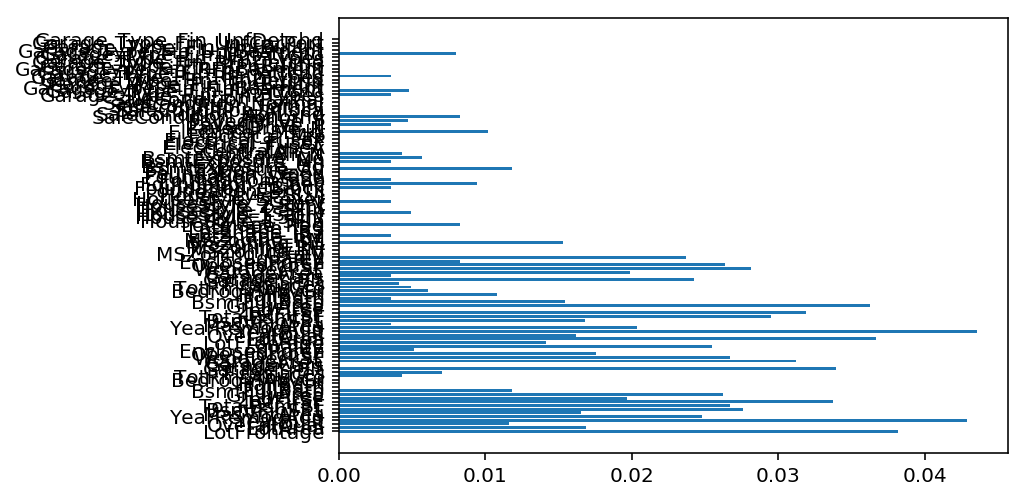

In [333]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, Y_train)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns)
''

In [135]:
rcParams['figure.figsize'] = (20, 20)

In [ ]:
sns.pairplot(X_train, diag_kind="kde")

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=20, max_features=0.8, n_jobs=-1)

clf_rf.fit(X_train, Y_train)  

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [10]:
cat_feat = list(test.dtypes[test.dtypes == object].index)
num_feat = [f for f in test if f not in (cat_feat + ['ID', 'Saleprice'])]
cat_nunique = train[cat_feat].nunique()

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
dummy_train = pd.get_dummies(X_train, columns=cat_feat)
dummy_test = pd.get_dummies(X_test, columns=cat_feat)

#dummy_cols = list(set(dummy_train) & set(dummy_test))
# вот эта строка - если есть данные в тесте но нет в трейне

X_train = dummy_train[dummy_cols]
X_test = dummy_test[dummy_cols]


X_train = pd.concat([X_train[num_feat], dummy_train], axis=1)

X_test = pd.concat([X_test[num_feat], dummy_test], axis=1)

KeyError: 'MSZoning'